This is a notebook for find the color target for eco-disaster 

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

from matplotlib import patches as patches

import importlib

import color_target_fun as ctf


(300, 400, 3)


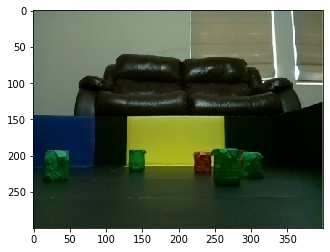

In [3]:
bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000001.jpg")
#bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000083.jpg")
img = bgrimg[...,::-1]
print(img.shape)
plt.imshow(img)

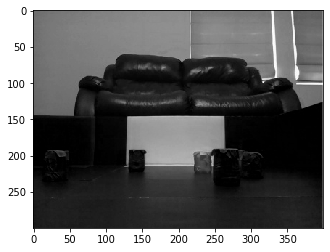

In [4]:
imgr = img[:,:,0]
plt.imshow(imgr,'gray')

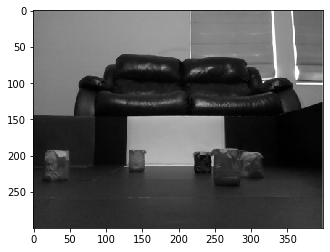

In [5]:
imgg = img[:,:,1]
plt.imshow(imgg,'gray')

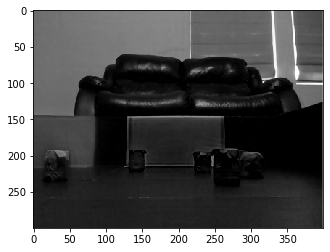

In [6]:
imgb = img[:,:,2]
plt.imshow(imgb,'gray')

(300, 400, 3)
    norm_rgb max:  [0.89189189 1.         0.8       ]
    norm_rgb min:  [0.         0.10810811 0.        ]


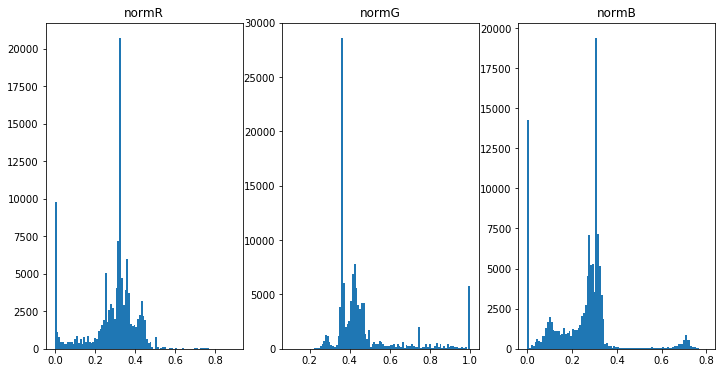

In [7]:
norm_rgb = ctf.normRGB(img, True)

(120000, 3)
    patch max:  [254 255 255]
    patch min:  [0 1 0]
    r/g max:  8.048780487804878
    r/g min:  0.0
    r/b max:  1210.0
    r/b min:  0.0
    g/b max:  11300.0
    g/b min:  0.24968789013732834


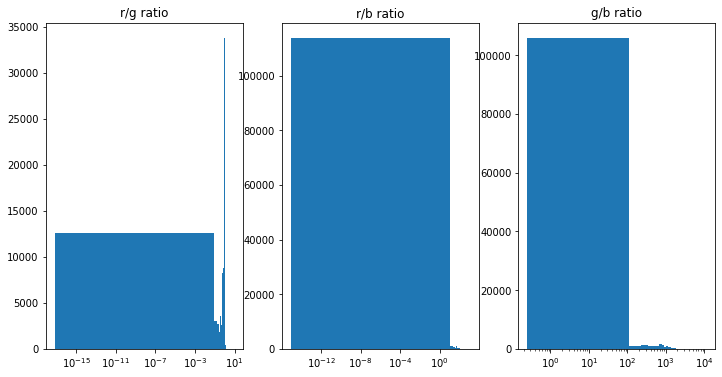

In [8]:
ratioRG, ratioRB, ratioGB = ctf.patch_stats(img)
rgbRatioImg = np.dstack((ratioRG, ratioRB, ratioGB))

(10, 5, 3)
(50, 3)
    patch max:  [86 36 17]
    patch min:  [59 12  0]
    r/g max:  4.87603305785124
    r/g min:  2.165242165242165
    r/b max:  750.0
    r/b min:  4.444444444444444
    g/b max:  2800.0
    g/b min:  2.05761316872428


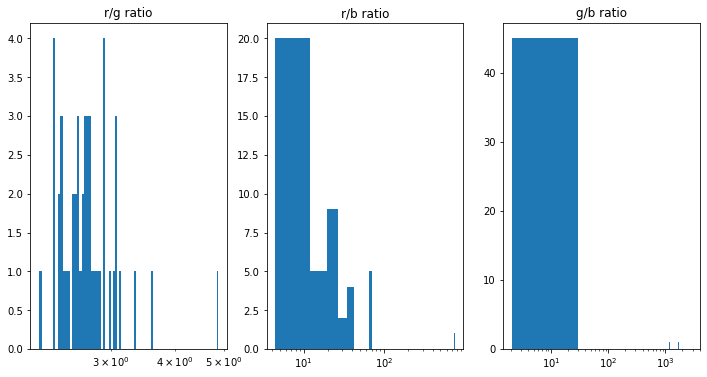

In [9]:
# find the red target, i.e. the one with r >> g & b, and g & b are close  
# a red patch 
patch = img[210:220,230:235,:]
print(patch.shape)
t1,t2,t3 = ctf.patch_stats(patch)

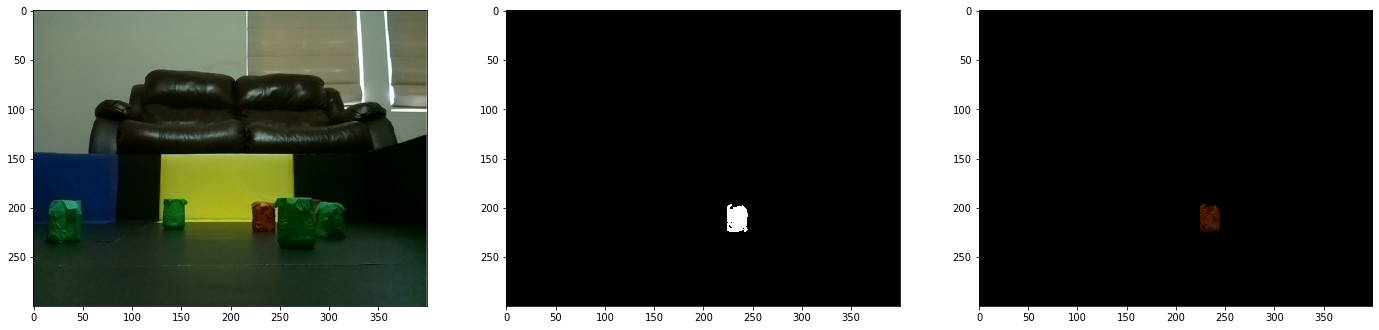

In [10]:
plt.rcParams['figure.figsize'] = [24, 12]
#use RGB ratio for red color
red_mask_ratio  = (ratioRG>2) & (ratioRB>2) & (img[:,:,1]<50) & (img[:,:,2]<50)
ctf.visMask(img, red_mask_ratio, [24, 12])

(<matplotlib.axes._subplots.AxesSubplot at 0x1d925bba988>,
 <matplotlib.image.AxesImage at 0x1d925ad07c8>)

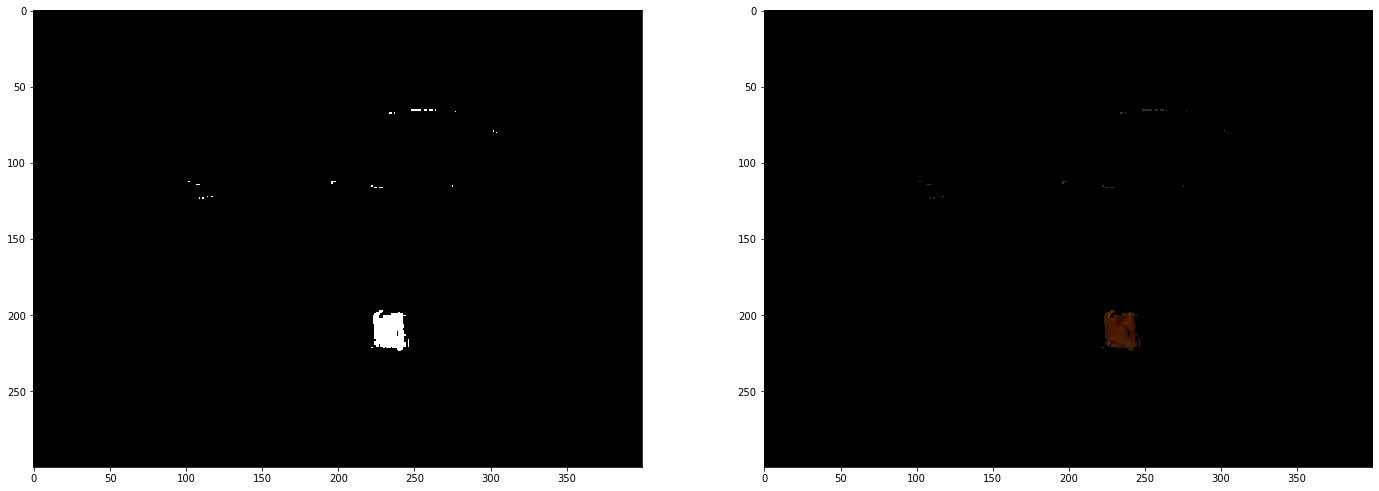

In [11]:
# use RGB threshold 
im_red_mask = cv2.inRange(img, (50, 0, 0), (255, 50, 50))
plt.subplot(121),plt.imshow(im_red_mask,'gray')
im_red_mask = im_red_mask.astype('bool')
plt.subplot(122), plt.imshow(img * np.dstack((im_red_mask, im_red_mask, im_red_mask)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1d9258015c8>,
 <matplotlib.image.AxesImage at 0x1d92576d9c8>)

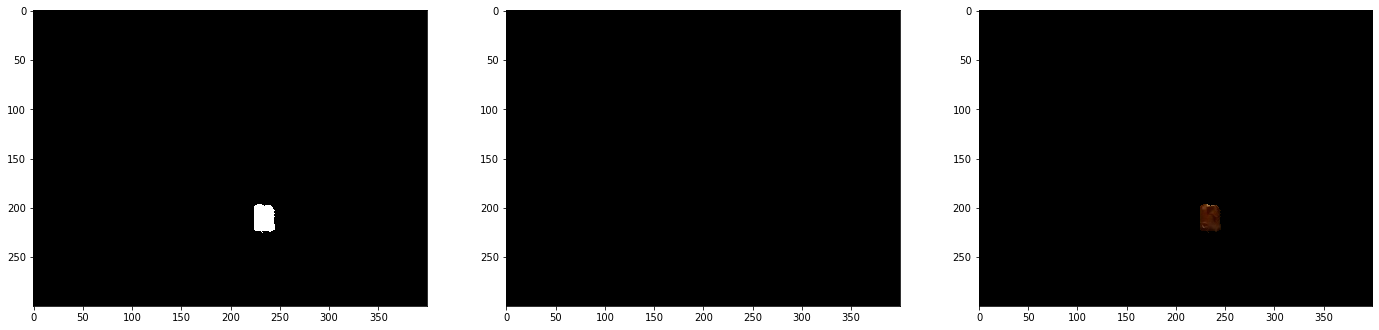

In [12]:
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
im_red_mask_1 = cv2.inRange(hsvimg, (0, 100, 30), (15, 255, 255))
im_red_mask_2 = cv2.inRange(hsvimg, (165, 100, 30), (180, 255, 255)) 
plt.subplot(131),plt.imshow(im_red_mask_1,'gray')
plt.subplot(132),plt.imshow(im_red_mask_2,'gray')
im_red_mask_1 = im_red_mask_1.astype('bool')
im_red_mask_2 = im_red_mask_2.astype('bool')
im_red_mask_hsv = im_red_mask_1 + im_red_mask_2
plt.subplot(133), plt.imshow(img * np.dstack((im_red_mask_hsv, im_red_mask_hsv, im_red_mask_hsv)))

(10, 5, 3)
    norm_rgb max:  [0.83098592 0.27586207 0.1328125 ]
    norm_rgb min:  [0.59375    0.16901408 0.        ]


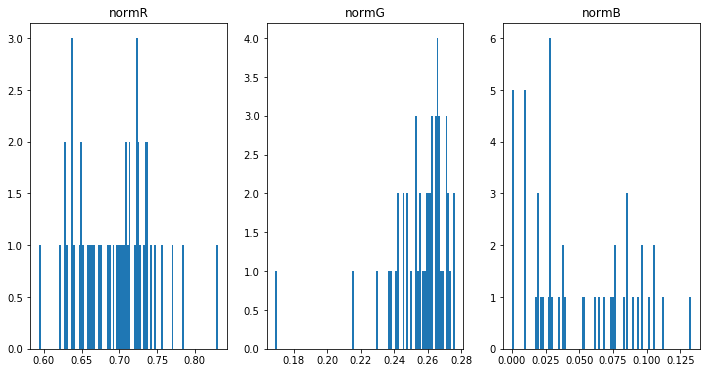

In [13]:
# use normRGB to for the segmentation 
patch = img[210:220,230:235,:]
normpatch = ctf.normRGB(patch, True)

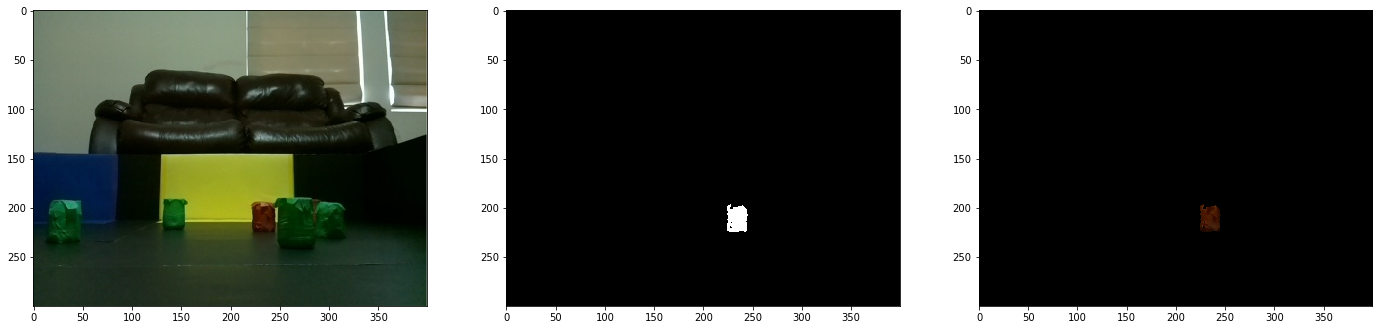

In [14]:
#use normRGB for red color
normRGBTh = [0.5, -0.3, -0.2]
mask1 = ctf.img_mask(norm_rgb, normRGBTh)
imgRGBTh = [0, -50, -50]
mask2 = ctf.img_mask(img, imgRGBTh)
red_norm_mask = mask1 & mask2
ctf.visMask(img, red_norm_mask)

ground patch
(50, 3)
    patch max:  [36 58 48]
    patch min:  [30 53 41]
    r/g max:  0.6304728546409807
    r/g min:  0.5545286506469501
    r/b max:  0.7888631090487239
    r/b min:  0.7256235827664399
    g/b max:  1.3167520117044624
    g/b min:  1.18725265569673


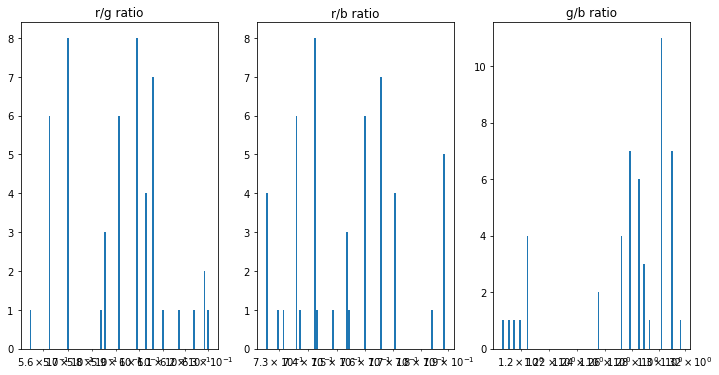

patch on green (dark) 
(50, 3)
    patch max:  [ 48 110  59]
    patch min:  [ 0 38  0]
    r/g max:  0.46109510086455335
    r/g min:  0.0
    r/b max:  10.0
    r/b min:  0.0
    g/b max:  4600.0
    g/b min:  1.824241361164708


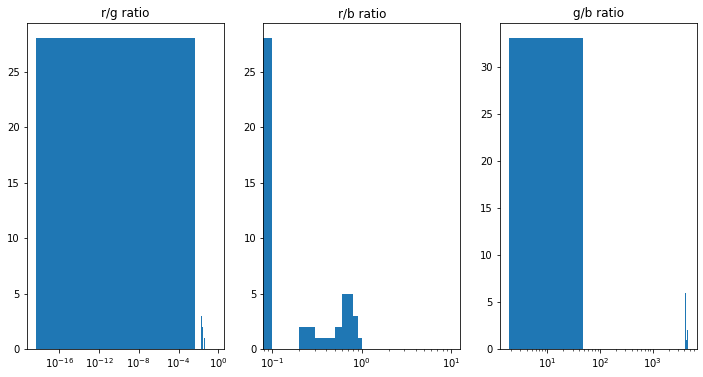

In [15]:
#find green color 
#a ground patch with some green
print("ground patch")
patch = img[260:270,350:355,:]
t,t,t=ctf.patch_stats(patch)
#green patch 
print("patch on green (dark) ")
patch2 = img[200:210,270:275,:]
t,t,t=ctf.patch_stats(patch2)

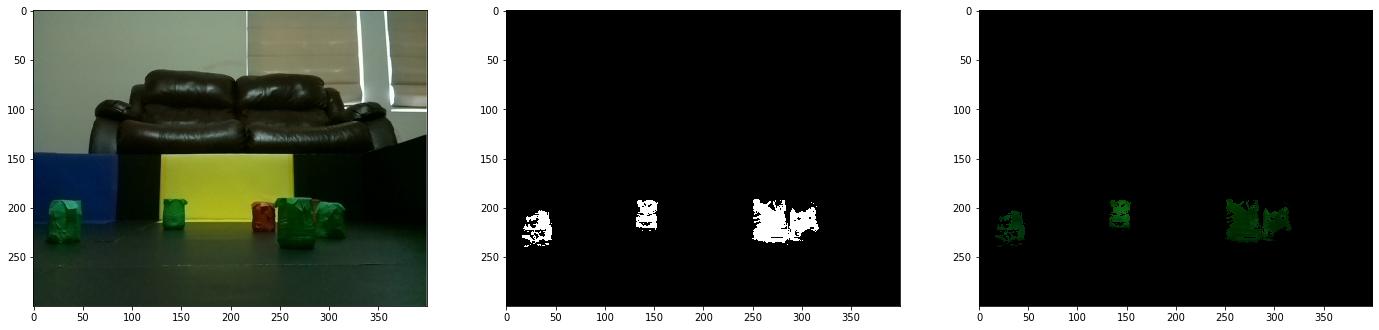

In [150]:
# use RGB ratio
rg_th = 0.2 # 0.3
gb_th = 3
r_th = 30 #50
g_th = 30 #30
b_th = 30 #50
#green_mask_ratio  = (ratioRG < rg_th) & (ratioGB>gb_th) & (img[:,:,0]<r_th) & (img[:,:,1]>g_th) & (img[:,:,2]<b_th)
green_mask_ratio  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([-r_th, g_th, -b_th]), np.array([-rg_th, 0, gb_th]), True, [24,12])

(<matplotlib.axes._subplots.AxesSubplot at 0x1d9244c2788>,
 <matplotlib.image.AxesImage at 0x1d9240e1208>)

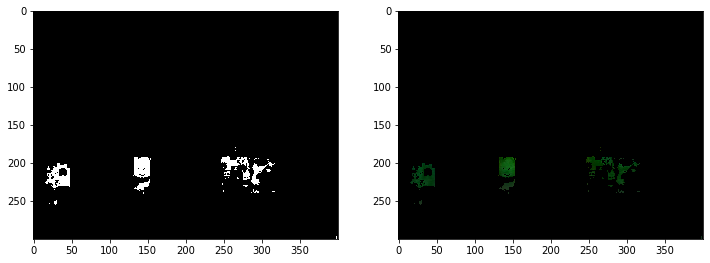

In [17]:
# use RGB 
im_green_mask = cv2.inRange(img, (0, 50, 0), (30, 255, 30))
plt.subplot(121),plt.imshow(im_green_mask,'gray')
im_green_mask = im_green_mask.astype('bool')
plt.subplot(122), plt.imshow(img * np.dstack((im_green_mask, im_green_mask, im_green_mask)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1d935162a08>,
 <matplotlib.image.AxesImage at 0x1d936b17fc8>)

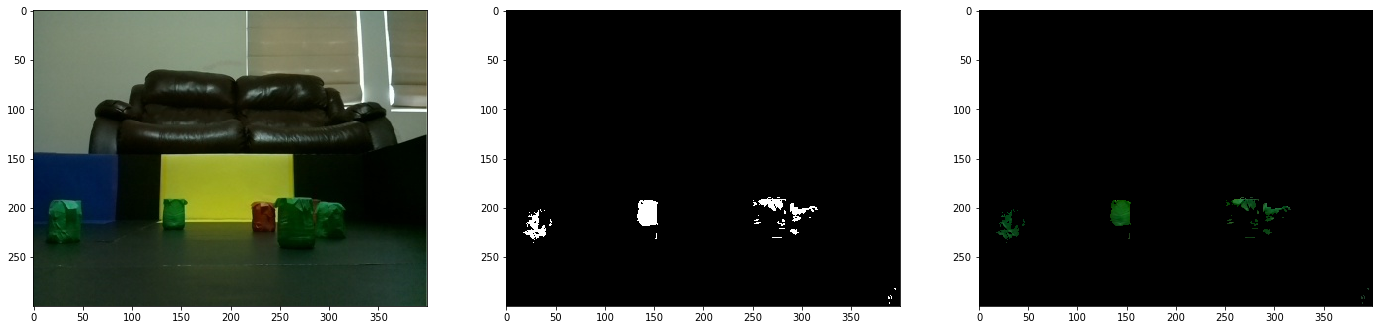

In [149]:
#use hsv threshold
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#im_green_mask = cv2.inRange(hsvimg, (50, 120, 55), (70, 255, 255))
im_green_mask = cv2.inRange(hsvimg, (55, 120, 60), (70, 255, 255))
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(im_green_mask,'gray')
im_green_mask = im_green_mask.astype('bool')
plt.subplot(133), plt.imshow(img * np.dstack((im_green_mask, im_green_mask, im_green_mask)))

ground patch
(10, 5, 3)
    norm_rgb max:  [0.25954198 0.432      0.34108527]
    norm_rgb min:  [0.24       0.40425532 0.32307692]


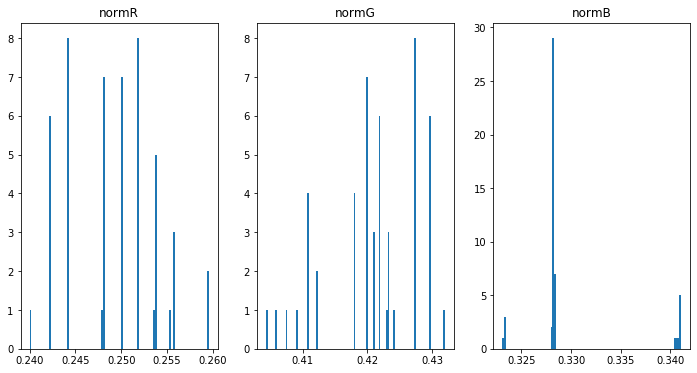

patch on green (dark) 
(10, 5, 3)
    norm_rgb max:  [0.25954198 0.432      0.34108527]
    norm_rgb min:  [0.24       0.40425532 0.32307692]


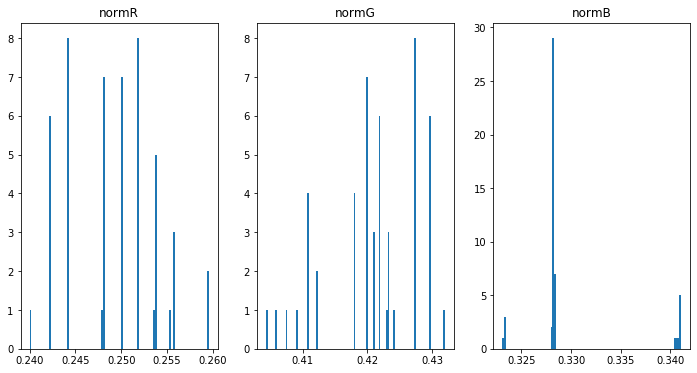

In [19]:
#find green color 
#a ground patch with some green
print("ground patch")
patch = img[260:270,350:355,:]
normpatch = ctf.normRGB(patch, True)
#green patch 
print("patch on green (dark) ")
patch2 = img[200:210,270:275,:]
normpatch = ctf.normRGB(patch, True)

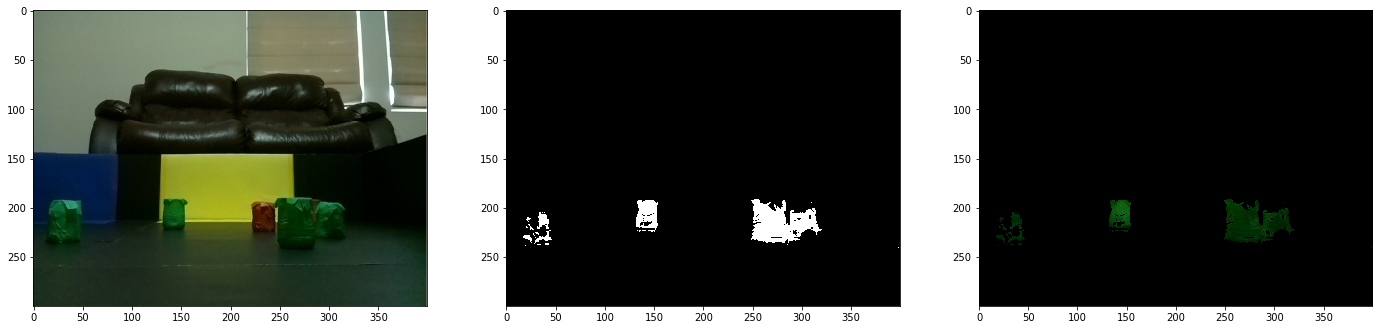

In [20]:
#use normRGB for green color
normRGBTh = [-0.2, 0.6, -0.2]
mask1 = ctf.img_mask(norm_rgb, normRGBTh)
imgRGBTh = [-30, 30, -30]
mask2 = ctf.img_mask(img, imgRGBTh)
green_norm_mask = mask1 & mask2
ctf.visMask(img, green_norm_mask)

patch on blue
(50, 3)
    patch max:  [ 3 31 72]
    patch min:  [ 0 28 68]
    r/g max:  0.09646302250803858
    r/g min:  0.0
    r/b max:  0.0427960057061341
    r/b min:  0.0
    g/b max:  0.4427938865876303
    g/b min:  0.40839318405858327


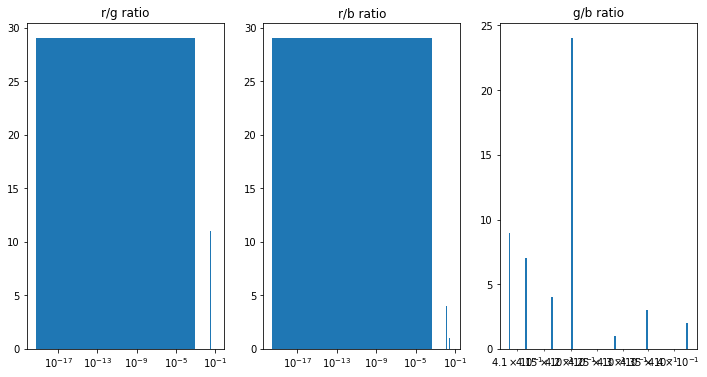

In [21]:
# find the blue mask 
print("patch on blue")
patch = img[155:165,40:45,:]
t,t,t=ctf.patch_stats(patch)

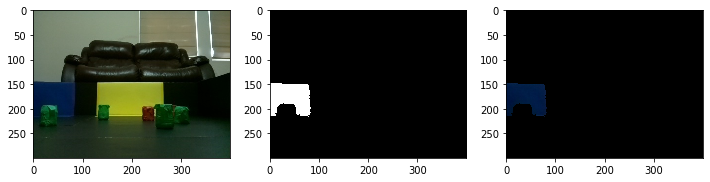

In [22]:
#use RGB ratio for Blue
rg_th = -0.5
rb_th = -0.2
gb_th = -0.5
r_th = -20
g_th = -50
b_th = 40
blue_mask_ratio  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), True)

patch on yellow
(50, 3)
    patch max:  [160 172  51]
    patch min:  [155 166  36]
    r/g max:  0.940623162845385
    r/g min:  0.9280190362879239
    r/b max:  4.293628808864265
    r/b min:  3.131115459882583
    g/b max:  4.609830602610386
    g/b min:  3.3522838659086456


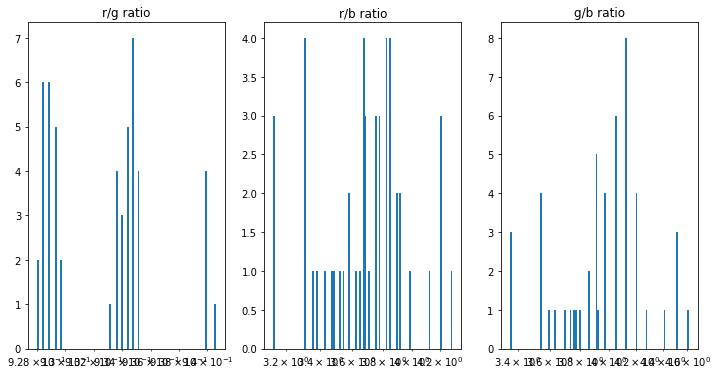

In [23]:
#find yello target
print("patch on yellow")
patch = img[155:165,190:195,:]
t,t,t=ctf.patch_stats(patch)

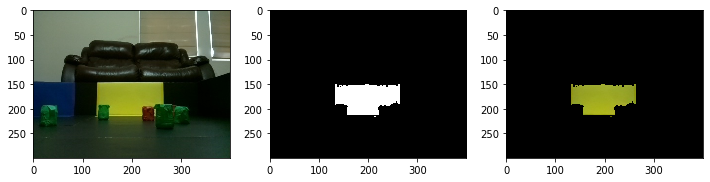

In [24]:
#use RGB ratio for Blue
rg_th = -1
rb_th = 3
gb_th = 3
r_th = 100
g_th = 100
b_th = -60
yellow_mask_ratio1  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), True)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d925958d88>,
 <matplotlib.image.AxesImage at 0x1d92455e0c8>)

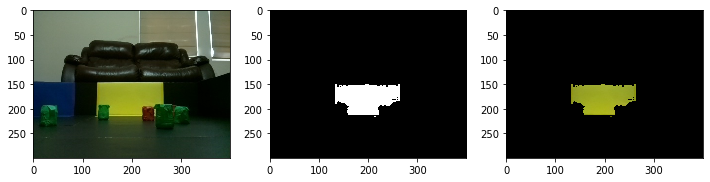

In [25]:
rg_th = 0.9
rb_th = 0
gb_th = 0
r_th = 0
g_th = 0
b_th = 0
yellow_mask_ratio  = yellow_mask_ratio1 & ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), False)
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(yellow_mask_ratio,'gray')
plt.subplot(133), plt.imshow(img * np.dstack((yellow_mask_ratio, yellow_mask_ratio, yellow_mask_ratio)))

patch on black wall
(50, 3)
    patch max:  [1 5 1]
    patch min:  [0 2 0]
    r/g max:  0.3225806451612903
    r/g min:  0.0
    r/b max:  10.0
    r/b min:  0.0
    g/b max:  400.0
    g/b min:  4.9504950495049505


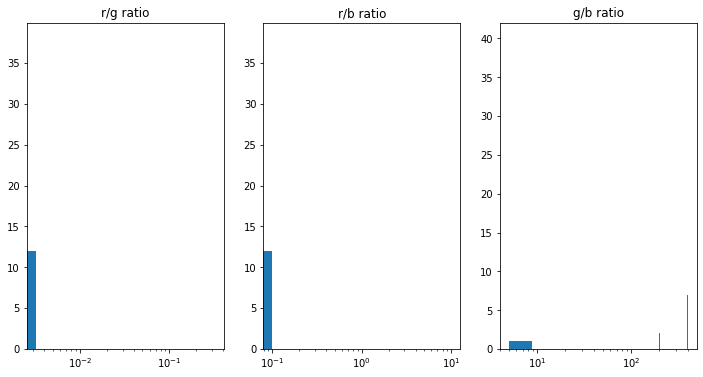

In [26]:
#now find the black wall 
print("patch on black wall")
patch = img[155:165,350:355,:]
t,t,t=ctf.patch_stats(patch)

patch on black wall 2
(50, 3)
    patch max:  [ 6 13  7]
    patch min:  [ 2 10  2]
    r/g max:  0.5405405405405406
    r/g min:  0.1801801801801802
    r/b max:  2.380952380952381
    r/b min:  0.3278688524590164
    g/b max:  6.467661691542289
    g/b min:  1.5691868758915835


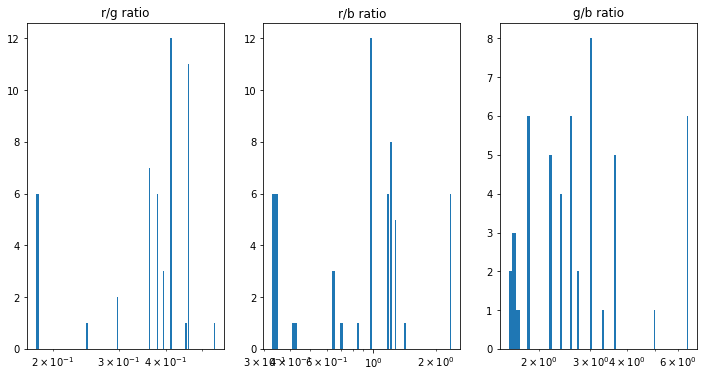

In [27]:
print("patch on black wall 2")
patch = img[155:165,95:100,:]
t,t,t=ctf.patch_stats(patch)

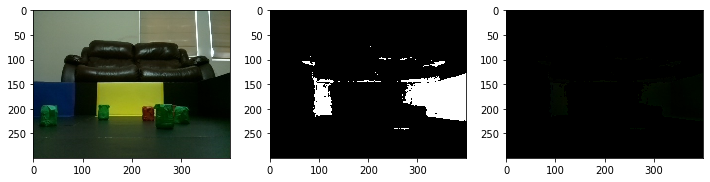

In [28]:
rg_th = -0.6
rb_th = 0
gb_th = 1.5
r_th = -10
g_th = -15
b_th = -10
blk_mask_ratio  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), True)

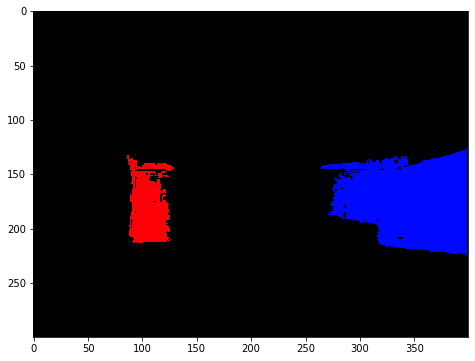

In [29]:
#clean up the masks 
sizeTh = 1000
num_labels, labels_im, stats, centroid = ctf.maskLabeling(blk_mask_ratio, sizeTh)
ctf.imshow_components(labels_im)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d9266fc408>,
 <matplotlib.image.AxesImage at 0x1d927b6a688>)

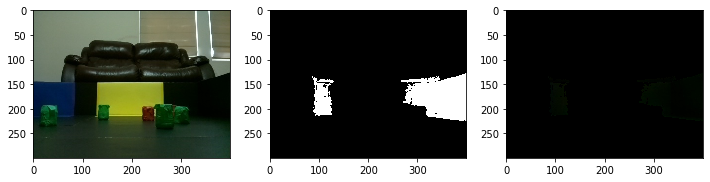

In [30]:
mask_clean = labels_im>0
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(mask_clean,'gray')
plt.subplot(133), plt.imshow(img * np.dstack((mask_clean, mask_clean, mask_clean)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1d927b6d248>,
 <matplotlib.image.AxesImage at 0x1d925cf57c8>)

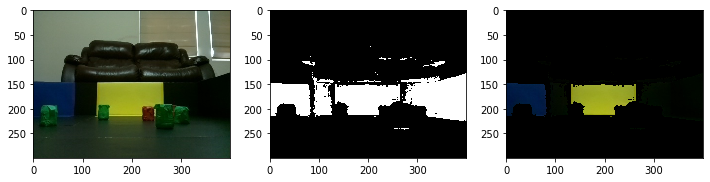

In [31]:
#combine the yellow, blue, and black for the wall
wall_mask = blk_mask_ratio + blue_mask_ratio + yellow_mask_ratio 
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(wall_mask,'gray')
plt.subplot(133), plt.imshow(img * np.dstack((wall_mask, wall_mask, wall_mask)))

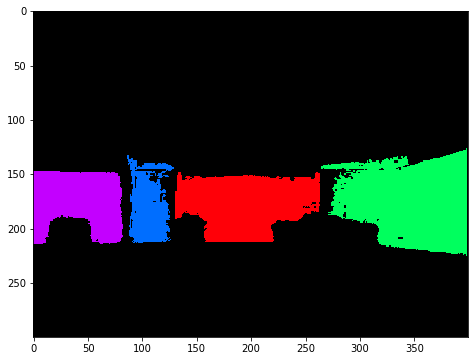

In [32]:
#clean up the masks 
sizeTh = 1000
num_labels, labels_im, stats, centroids = ctf.maskLabeling(wall_mask, sizeTh)
ctf.imshow_components(labels_im)

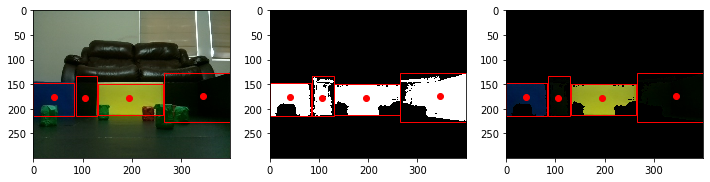

In [33]:
mask_clean = labels_im>0
#rects = ctf.createRectangles(stats[1:,:-1])
plt.subplot(131),plt.imshow(img)
ctf.plotRectangle(stats[1:,:-1], plt.gca())
plt.plot(centroids[1:,0],centroids[1:,1],'ro')
plt.subplot(132),plt.imshow(mask_clean,'gray')
ctf.plotRectangle(stats[1:,:-1], plt.gca())
plt.plot(centroids[1:,0],centroids[1:,1],'ro')
plt.subplot(133), plt.imshow(img * np.dstack((mask_clean, mask_clean, mask_clean)))
ctf.plotRectangle(stats[1:,:-1], plt.gca())
plt.plot(centroids[1:,0],centroids[1:,1],'ro')

14


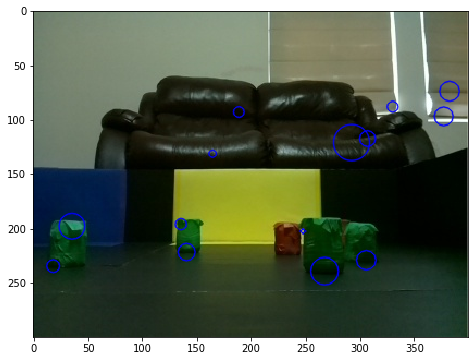

In [58]:
# try blob finder from opencv 
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 250

# Filter by Area.
params.filterByArea = True
params.minArea = 10
#params.maxArea = 10000

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.0

# Filter by Inertia (ratio of widest to thinnest point)
params.filterByInertia = False
#params.maxInertiaRatio = .5
params.minInertiaRatio = 0.2

params.filterByColor = True

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
keypoints = detector.detect(grayimg)
print(len(keypoints))
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

(<matplotlib.axes._subplots.AxesSubplot at 0x1d92fe8b388>,
 <matplotlib.image.AxesImage at 0x1d92feeb788>)

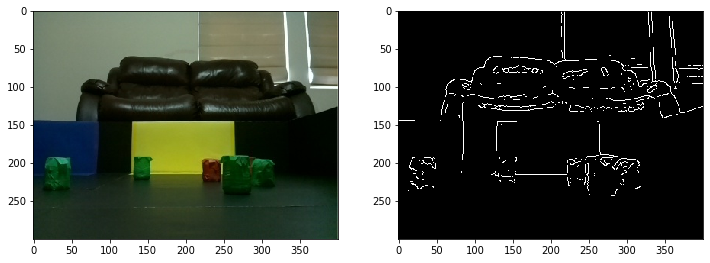

In [109]:
#try edge detector 
grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(grayimg,(7,7),0)
edges = cv2.Canny(blur,40,40)
plt.subplot(121), plt.imshow(img,'gray')
plt.subplot(122), plt.imshow(edges,'gray')